<a href="https://colab.research.google.com/github/carlosasenciom/SIM_YAC_ASENCIO_UPSE2023/blob/main/implicita%20qvs%20p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy  as np
import math

In [58]:

L=30000
dx=600
Tiempo=100
DT=1
K=50 #Permeabilidad MD
por=0.5
vis=1 # centipoise
Beta=0.7
CompTotal=1.2*10**(-6) #ps1-1
A=200000#ft^2

In [59]:
30000/600

50.0

In [60]:

Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

231.4814814814815

In [61]:
#Condiciones iniciales
Pyac=1000
Piz=1000
Pder=0
Pin=np.ones((L//dx)+2)
Qres=np.zeros((L//dx))
Pres=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[25]=7000
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]

Pin.shape

(52,)

In [62]:
#Esquema Implicito
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2))
Qimplicita=np.zeros((Tiempo//DT,(L//dx)))
Pres=np.zeros((L//dx)+2)
Pin=np.ones((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=(L//dx)+2
Baccumul=A*dx*por*CompTotal/Beta
Transmisibilidad=(K*A/(vis*Beta*dx))*6.33*10**-3
B=np.zeros([N-2,N-2])
T=np.zeros([N-2,N-2])
Transmisibilidad

150.71428571428572

In [63]:
for i in range(0,N-2):
  B[i,i]=Baccumul


for i in range(0,N-2):
  T[i,i]=2*Transmisibilidad
  if i>0:
    T[i,i-1]=-Transmisibilidad
  if i<(N-3):
    T[i,i+1]=-Transmisibilidad
#T[0,0]=3*Transmisibilidad
T[0,0]=2*Transmisibilidad
T[N-3,N-3]=2*Transmisibilidad


In [64]:
Matriz_resolucion=np.zeros_like(T)
Vector_sol=np.zeros_like(Pin[1:-1])
Matriz_resolucion=T+(B/DT)
Vector_sol=np.matmul(B/DT,Pin[1:-1])
#Pres=[]

Q=np.zeros_like(Vector_sol)
Q[0]=2*Transmisibilidad*Piz
Vector_sol=Vector_sol+Q
Vector_sol
Transmisibilidad

150.71428571428572

In [65]:
Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)

In [66]:
Qimplicita[0]=Q
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pres[25]=7000
  Pimplicita[t//DT]=Pres
  Vector_sol=np.matmul(B/DT,Pcal)+Q
  Qimplicita[t//DT]=Vector_sol
  t=t+DT

In [68]:
Qimplicita


array([[301428.57142857,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [450305.85057743, 123447.37981569, 112069.58532628, ...,
         93644.70038801,  82266.90589859,  56837.00656543],
       [467874.99748492, 139168.88466704, 122620.71151751, ...,
         83093.57419678,  66545.40104725,  39267.85965793],
       ...,
       [502153.01444585, 195749.19194187, 190802.89710509, ...,
         14911.3886092 ,   9965.09377242,   4989.842697  ],
       [502173.91942071, 195790.67717225, 190864.31854752, ...,
         14849.96716677,   9923.60854203,   4968.93772215],
       [502194.35984262, 195831.2409752 , 190924.37689003, ...,
         14789.90882426,   9883.04473908,   4948.49730024]])

In [69]:
Pimplicita

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [1000.        , 1447.41799173, 1200.18285932, ...,  799.81714068,
         552.58200827,    0.        ],
       [1000.        , 1618.22914221, 1353.03082315, ...,  646.96917685,
         381.77085779,    0.        ],
       ...,
       [1000.        , 1951.48764045, 1903.11714388, ...,   96.88285612,
          48.51235955,    0.        ],
       [1000.        , 1951.69088326, 1903.52047251, ...,   96.47952749,
          48.30911674,    0.        ],
       [1000.        , 1951.88960958, 1903.91484281, ...,   96.08515719,
          48.11039042,    0.        ]])

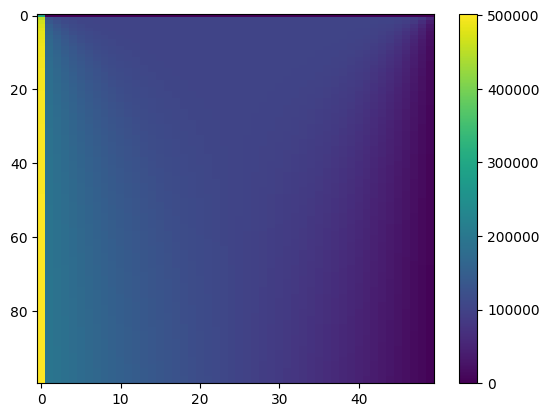

In [70]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Qimplicita,aspect='auto')
plt.colorbar()

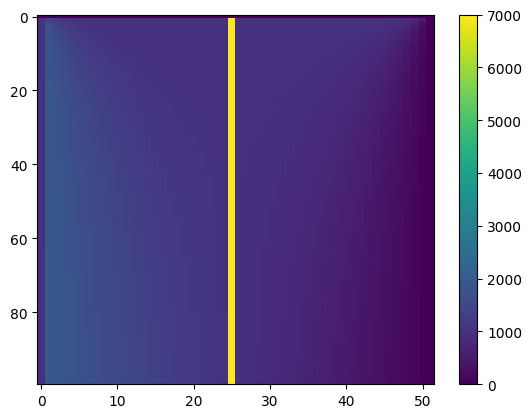

In [71]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()